### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python

clase 24/10/2019

#### Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	**Clasificación de imágenes.**
*	**Aprendizaje automático**
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.	

## Clasificación

Técnica incluída entre las técnicas de **aprendizaje automático (machine learning).**

Consiste en la asignación de una categoría o clase a un objeto/individuo o a un conjunto de objetos/individuos .

En cualquier problema de clasificación hay que identificar 
* que cosas/objetos/individuos queremos clasificar, 
* que datos/información tenemos de estos y 
* cuales o cuantas serían las posibles categorias o clases.

Podemos diferenciar dos tipos de clasificación:

**Supervisada** y **No supervisada**

En **clasificación supervisada** se requiere tener a disposición un conjunto de ejemplos (muestras u objetos) ya clasificados (tiene que ser numeroso y representativo). Con este conjunto (o una parte de él) se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento. La parte que no se usa para entrenamiento se guarda para test y/o validación.

En clasificación **No supervisada**  (en estadística también llamada clustering) no se conocen a priori datos ya clasificados y en general tampoco la cantidad de clases que se pretenden encontrar. Se busca descubrir alguna estructura presente en los datos y encontrar las clases naturales que se presentan, también llamadas clusters (por su nombre en inglés). 

Veamos un ejemplo de datos disponibles para **clasificación supervisada**:

Para esto usaremos librerías útiles para **aprendizaje automático** y **bases de datos**:


**scikit-learn: sklearn** y **pandas** respectivamente

In [ ]:
from sklearn.datasets import load_wine

#librería scikit-learn (sklearn) tiene a disposición bases de datos, usaremos una de ellas
datos = load_wine() #base de datos 'wine', la guardamos en la variable datos

print('base de datos:', type(datos))
print()
print('matriz de datos:  tamaño=', datos.data.shape, ' y  tipo= ',type(datos.data))
print()
print('X=', datos.data)
print()
print('nombre de las columnas/variables/features : tipo= ',type(datos.feature_names))
print()
print(datos.feature_names)
print()
print('etiquetas: tamaño=', datos.target.shape ,'tipo=',type(datos.target))
print()
print('y= ', datos.target)

**Base de datos wine: Un problema de clasificación sencillo con varias clases (multi-class, no binario)**

**178 muestras de tres clases (59 de la clase 0, 71 de la clase 1 y 48 de la clase 2)**

**De cada muestra tenemos 13 datos/variables/features medidas**

(ver más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

*En resumen: Son 178 registros (ejemplos/objetos/instancias o muestras) con 13 datos/características/variables/features
En este ejemplo cada registro ya está etiquetado en una de 3 clases*

### Armado de la tabla con datos: Data Frame mediante librería pandas

In [ ]:
import pandas as pd  #librería útil para base de datos
#armado de base de datos: tipo Data Frame
df = pd.DataFrame(datos.data, columns=datos.feature_names)
print('tamaño de la tabla sólo de los datos (sin contar las etiquetas):', df.shape)
df.head(6) #se muestran las primeras 6 líneas/filas/ejemplos

In [ ]:
df.tail(6) #las últimas 6 filas

### Etiquetas/target  
Etiquetas numéricas codificadas

In [ ]:
print(datos.target)#128 etiquetas , con 3 etiquetas diferentes, codificadas con 
#0 la class_0, 1 la class_1 y 2 la class_2
print(type(datos.target[0]))
print(datos.target_names)#

#### Se agrega columna con el etiquetado a la tabla df

In [ ]:
df['etiquetas']=data.target
df.head(4)

### Gráfico de la base

**primero sin considerar las etiquetas/clases**

In [ ]:
import matplotlib.pyplot as plt

#LAs muestras viven en un espaciio de dimensión 13, pues hay 13 variables, 13 datos por cada muestra
## de proyectará a un espacio de 2 dimensiones para graficar, se seleccionarán de a dos las variables
### Eleccción de las dos variables: 
variable1=datos.feature_names[6] # si j=6, séptima variable
variable2=datos.feature_names[8] # si l=8, novena variable
x=df[variable1]
y=df[variable2]
print()
plt.scatter(x, y,c='gray')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

**cada punto (par) $(X_{i,j}, X_{i,l})$, es la i-ésima muestra/vino/fila de las dos mediciones/columnas elegidas: $j$ y $l$. Hay 168 pares en la gráfica**

**Ejercicio: En el último bloque de código cambie las variables seleccionadas por otras dos e interprete**

### Gráfico de la base

**Ahora coloreando las muestras/pares (vinos) según las etiquetas (target/clase $y_{i}$ de la i-ésima muestra)**

In [ ]:
import matplotlib.pyplot as plt

j=1 #número (entre 0 y 12) de la variable/columna para graficar en el eje horizontal
l=3 #número (entre 0 y 12) de la variable/columna para graficar en el eje vertical
var1=datos.feature_names[j] #nombre de la variable en horizontal
var2=datos.feature_names[l] #nombre de la variable en vertical

plt.scatter(df_train[var1][y_train==0], df_train[var2][y_train==0], c='orange')#clase 0, color naranja
plt.scatter(df_train[var1][y_train==1], df_train[var2][y_train==1], c='blue')# clase 1, color azul
plt.scatter(df_train[var1][y_train==2], df_train[var2][y_train==2], c='purple')#clase 2, color violeta

#agregamos al gráfico los nombres de las variables que se graficaron
plt.xlabel(var1)#eje horizontal
plt.ylabel(var2)#eje vertical

plt.legend(labels=('class_0', 'class_1', 'class_1'))
plt.title('Scatter Plot 2D de base etiquetada')
plt.show()

**cada par $(X_{i,j}, X_{i,l})$, se pinta de naranja si $y_i=0$, azul si $y_i=1$ y violeta si $y_i=2$**

### Se divide la base en 2 subconjuntos: 70% para Entrenamiento y 30% para Test (también se suele usar 80%-20%)

In [ ]:
from sklearn.model_selection import train_test_split

#se dividen "aleatoriamente" los datos acompañados de las etiquetas correspondientes:

X_train, X_test, y_train, y_test = train_test_split(datos.data,datos.target,
                                                    test_size=0.3,
                                                    random_state=167) 
#el último parámetro es la semilla para que sea reproducible la selección (pseudo-aleatoria)

#### Verificamos los tamaños de cada subconjunto de la base, 

In [ ]:
print('tamaños de c/u:  train  test')
print(' - datos:    ',X_train.shape,X_test.shape)
print(' - etiquetas:  ', y_train.shape,y_test.shape)

In [ ]:
#armado de las nuevas bases de datos. Entrenamiento
df_train = pd.DataFrame(X_train, columns=datos.feature_names)
df_train['etiqueta']=y_train
df_train.tail(3)

In [ ]:
#Base de datos para test
df_test = pd.DataFrame(X_test, columns=datos.feature_names)
df_test.tail(3)

#### Base de entrenamiento (en colores, según etiqueta) y datos de test (en gris, no se considera la etiqueta)

**Se grafican de a dos variables a la vez** eligiendo j y l

Ejercicio: Pruebe diferentes pares de variables y responda. ¿Existe algun par (proyección en espacio bidimensional) en donde las clases se vean separables? y separables linealmente? 

In [ ]:
j=1 #número (entre 0 y 12) de la variable/columna para graficar en el eje horizontal
l=10 #número (entre 0 y 12) de la variable/columna para graficar en el eje vertical
var1=datos.feature_names[j] #nombre de la variable en horizontal
var2=datos.feature_names[l] #nombre de la variable en vertical

plt.scatter(df_train[var1][y_train==0], df_train[var2][y_train==0], c='orange')#clase 0, color naranja
plt.scatter(df_train[var1][y_train==1], df_train[var2][y_train==1], c='blue')# clase 1, color azul
plt.scatter(df_train[var1][y_train==2], df_train[var2][y_train==2], c='purple')#clase 2, color violeta
plt.scatter(df_test[var1], df_test[var2], c='gray')#datos de test grises sin considerar su etiqueta
plt.scatter(df_test[var1][0], df_test[var2][0], c='red')#primera observación del grupo de test en rojo

#agregamos al gráfico los nombres de las variables que se graficaron
plt.xlabel(var1)#eje horizontal
plt.ylabel(var2)#eje vertical

plt.legend(labels=('class_0', 'class_1', 'class_1','test','1st test??'))
plt.title('Scatter Plot')
plt.show()

Ejercicio: ¿Cómo clasificaría a la primera observación de grupo de test (pintada de rojo) usando la gráfica de dos variables?
y a la última?

Verifique si ambas elecciones fueron correctas

## Clasificación de imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**

Primero Abordaremos 

### Clasificación dentro de una imagen

Dividir a la imagen en regiones. Los objetos/muestras a clasificar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

**Ejemplo: Imagen monocroma**

El ejemplo más simple es cuando la imagen es monocroma una sola medida para cada pixel: la intensidad.

**binarización: 2 clases, puede ser clase 1: objetos y clase 2: fondo **

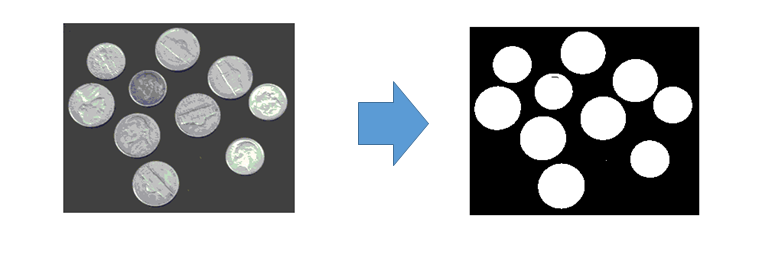

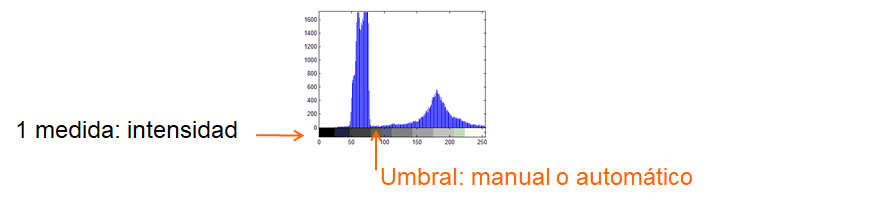

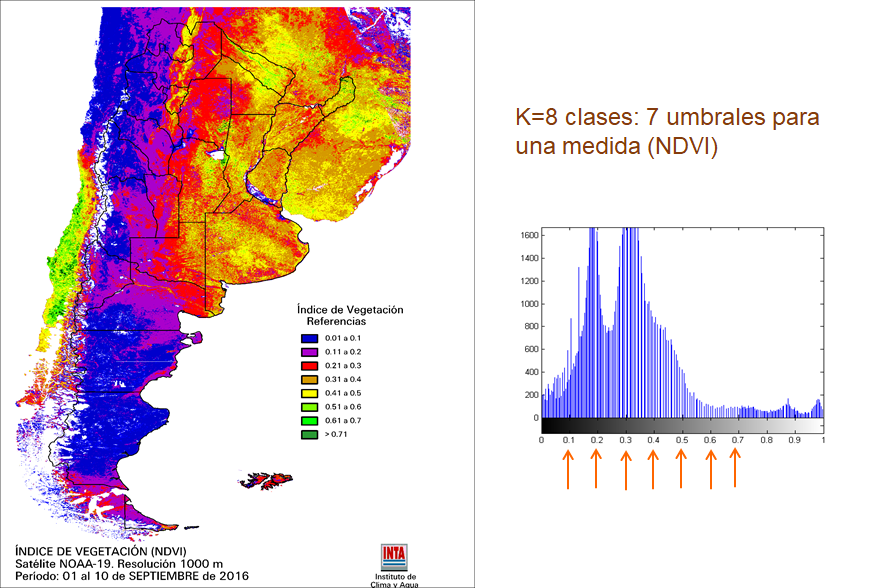

**Índice verde** en cada pixel obtenido de imágenes satelitales:

$$NDVI= \frac{(IRC-r)}{(IRC+r)}$$ 

donde $IRC$ es el Infrarrojo cercano 
y $r$ es la componente roja (del visible)

**Imágenes en general:** Cada pixel tiene un vector de datos o características, puede tener una, tres o más (características/datos), según el tipo de imagen.

**Ejemplo:** imágenes a color RGB

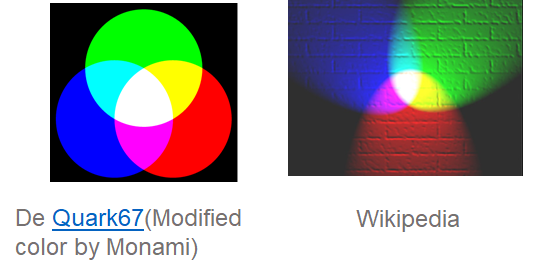

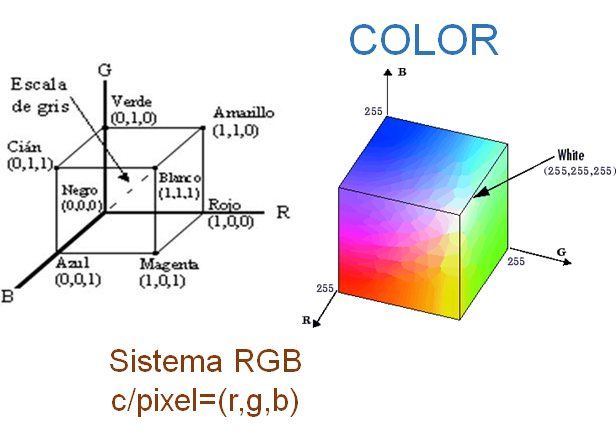

In [1]:
import cv2
campo=cv2.imread('Campo.png')
cv2.imshow('pulse una tecla aquí',campo)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

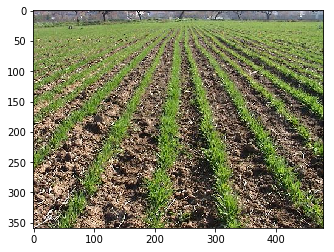

In [3]:
from matplotlib import pyplot as plt
plt.imshow(campo[:,:,[2,1,0]])
plt.show()

### Armado de la base de pixeles como Data Frame

In [4]:
import numpy as np
dims=campo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=campo[f,c,:]

import pandas as pd
df = pd.DataFrame(data0, columns=["pixel_id","azul","verde","rojo"])

print(df.shape)
print('Base de pixeles:')
df.head()   

(171961, 4)
Base de pixeles:


,pixel_id,azul,verde,rojo
0,0,161,155,186
1,1,176,171,202
2,2,165,159,190
3,3,177,172,203
4,4,164,160,189


### Visualización de los datos en 3D (BxGxR)

el próximo bloque demora un poco al correrse, paciencia...

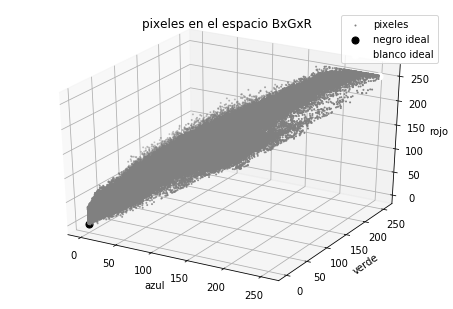

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

variables=["azul","verde","rojo"]
x1=df[variables[0]].values 
x2=df[variables[1]].values
x3=df[variables[2]].values


ax.scatter(x1,x2,x3,c='gray', s=1)
ax.scatter(0,0,0,c='black', s=50)
ax.scatter(255,255,255,c='white', s=50)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
ax.set_title('pixeles en el espacio BxGxR')
ax.legend(labels=('pixeles','negro ideal','blanco ideal'))
plt.show()

## ¿Clasificación no supervisada? Clustering: K-medias, mean shift,Dbscan ... 

### K-means o k-medias
**Es un método automático de clasificación no supervisada. En este caso K es la cantidad de clases, es un parámetro del algoritmo, el usuario lo tiene que elgir ( hiperparámetro del algoritmo).**
* genera aleatoriamente K centroides en el espacio de las variables (dimensión n=cantidad de variables/features).
* casifica los datos en K clases por cercanía (menor distancia euclídea) a los centroides.
* recalcula los K centroides usando el centro de masa (promedio) de cada clase.
* se repite el proceso de clasificación y recálculo de los centroides hasta la estabilidad (K clases estables)

In [10]:
# Librerías para Clustering
from sklearn.cluster import KMeans, DBSCAN

df_pix=df.drop('pixel_id',axis=1) #se quita la columna de identificación de pixel de la base

#se define el clasificador K-medias  con K=3
#se lo corre/entrena/ajusta con los pixeles la imagen
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pix)

#se define una base de datos que incluya los resultados
df_clusters=df.copy()
df_clusters['kmedias_3']=kmeans.labels_
df_clusters.head()

,pixel_id,azul,verde,rojo,kmedias_3
0,0,161,155,186,0
1,1,176,171,202,0
2,2,165,159,190,0
3,3,177,172,203,0
4,4,164,160,189,0


### Visualización
En del espacio BxGxR en 2D

se grafican de a dos (dimensión 2)


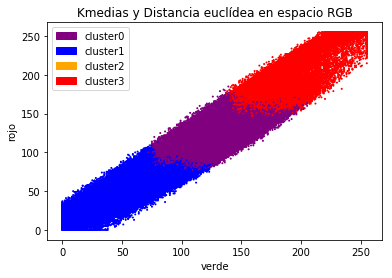

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores=['purple','blue','orange','red']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_clusters[variable1].values
f2 = df_clusters[variable2].values
f3 = df_clusters.kmedias_3

asignar=[]
l=len(f3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    asignar.append(colores[f3[k]-1])
    
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='cluster0')
patch2 = mpatches.Patch(color=colores[1], label='cluster1')
patch3 = mpatches.Patch(color=colores[2], label='cluster2')
patch4 = mpatches.Patch(color=colores[3], label='cluster3')
plt.legend(handles=[patch1,patch2,patch3,patch4])
plt.title('Kmedias y Distancia euclídea en espacio RGB')
plt.show()

### Visualización del "clusterizado" en la imagen

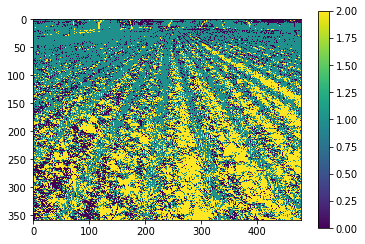

In [19]:
a=campo.shape #(fila, columna ,3)
clasif_campo=kmeans.labels_.reshape(a[0],a[1]) #etiquetas ubicadas en los lugares de la imagen

plt.imshow(clasif_campo)
plt.colorbar()
plt.show()

## Clasificación supervisada

### k-nearest neibours -- k-vecinos más cercanos

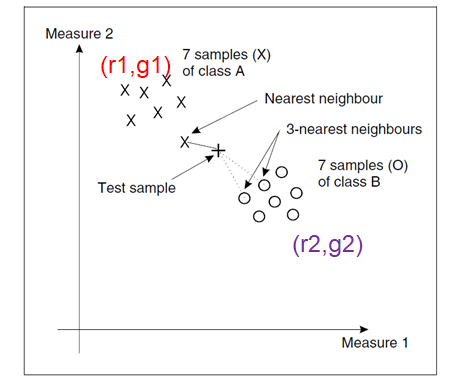

**Clasificación supervisada? ejemplos etiquetados? no hay, se pueden etiquetar algunos: **
### Clasificación supervisada / semi-supervisada.

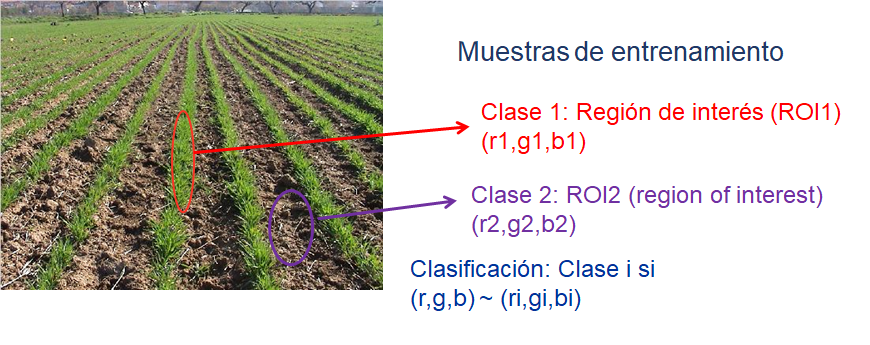

### Etiquetado manual: Usando selección de ROI (Region Of Interest/Región de interés)

### ROI 1: Cultivo

In [ ]:
showCrosshair = False
fromCenter = False
roi1 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

### ROI 2: Suelo

In [ ]:
showCrosshair = False
fromCenter = False
roi2 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI2:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

### ROI 1: Fondo

In [ ]:
showCrosshair = False
fromCenter = False
roi3 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI3:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

In [20]:
#roi1=(211, 180, 25, 72) #descomentar las tres primeras líneas si no se pudieron delimitar las ROI
#roi2=(136, 241, 47, 106)
#roi3=(145, 1, 121, 14)
rois=[roi1,roi2,roi3]

**Además del azul, verde y rojo, se pueden agregar más capas/columnas de datos/información, por ejemplo**
* **capas con bordes (Filtros Prewitt, Sobel, etc.)**
* **capas con información de textura (Filtros de Gabor, etc.)**


In [27]:
import numpy as np

bordes = cv2.Sobel(campo,cv2.CV_64F,1,1,ksize=5)#capa de bordes ()

campo2=np.zeros((bordes.shape[0],bordes.shape[1],6)) # defino una imagen con 6 canales

campo2[:,:,0:3]=campo #3 primeros canales imagen original
campo2[:,:,3:6]=bordes # 3 últimos canales con bordes
print(campo2.shape)

(359, 479, 6)


### Armado de la base de entrenamiento ampliada

In [35]:
import numpy as np
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,6])
target=np.zeros(cantidad)
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            data[cuenta,:]=campo2[fil,col,:]
            target[cuenta]=i
            cuenta=cuenta+1
    
print(cuenta)    
import pandas as pd
df = pd.DataFrame(data, columns=["azul","verde","rojo","bordes_azul","bordes_verde","bordes_rojo"])
print(df.shape)
print('target=',target, '; dimensión target=',target.shape)
df.head(10)


8476
8476
(8476, 6)
target= [0. 0. 0. ... 2. 2. 2.] ; tamaño= (8476,)


,azul,verde,rojo,bordes_azul,bordes_verde,bordes_rojo
0,59.0,130.0,113.0,-800.0,-767.0,-792.0
1,67.0,149.0,126.0,-384.0,-342.0,-365.0
2,113.0,205.0,176.0,41.0,92.0,58.0
3,45.0,146.0,114.0,61.0,92.0,73.0
4,76.0,185.0,147.0,-157.0,-135.0,-130.0
5,21.0,133.0,93.0,-268.0,-199.0,-194.0
6,34.0,148.0,108.0,31.0,148.0,142.0
7,49.0,155.0,118.0,379.0,475.0,467.0
8,85.0,190.0,153.0,298.0,326.0,323.0
9,54.0,157.0,119.0,50.0,40.0,39.0


### Gráfico en 2D de los datos

cantidad de observaciones: 8476
cantidad de clases: 3
cantidad de variables/dimension: 6
se grafican de a dos (dimensión 2)


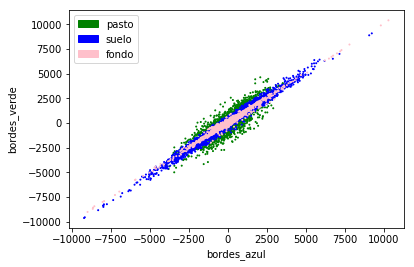

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores=['green','blue','pink']
variables=["azul","verde","rojo","bordes_azul","bordes_verde","bordes_rojo"]

variable1=variables[3]
variable2=variables[4]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',6)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

### Gráfico en 3D de los datos

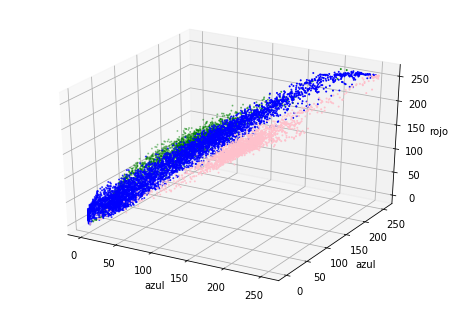

In [33]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

j=0 #3 números de variables a elegir entre 0 y 6  
l=1
m=2

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[j]].values, df[variables[l]].values, df[variables[m]].values,c=asignar, s=1)
ax.set_xlabel(variables[j])
ax.set_ylabel(variables[j])
ax.set_zlabel(variables[m])
plt.show()


**k-Nearest Neighbor con Scikit Learn Definimos el valor de k en 5 **

In [40]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors) #se define el clasificador
knn.fit(data, target)#se lo entrena/ajusta con los datos de entrenamiento
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data, target)))
print('Específicamente el {:.2f}'
     .format(100*knn.score(data, target)),'% de los datos de entrenamiento fueron clasificados correctamente')

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.93
Específicamente el 92.97 % de los datos de entrenamiento fueron clasificados correctamente


**Y el resto de la imagen??? Clasifiquemos la imagen completa usando el clasificacor entrenado**
**Este proceso demora, paciencia...**

In [43]:
a=campo.shape
print(a)
clasif=np.zeros(a[0:2])
print(knn.predict([[40, 80, 40, 0,0, 255]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([campo2[i,j,:]])
        
print('No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen')
print('Realizaremos una valoración visual')        

(359, 479, 3)
[1.]
No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen
Realizaremos una valoración visual


In [ ]:
plt.imshow(clasif)
plt.show()

## Mejora de la clasificación

* Filtro o algoritmo de modas (iterado)
* Moda: es el valor más repetido

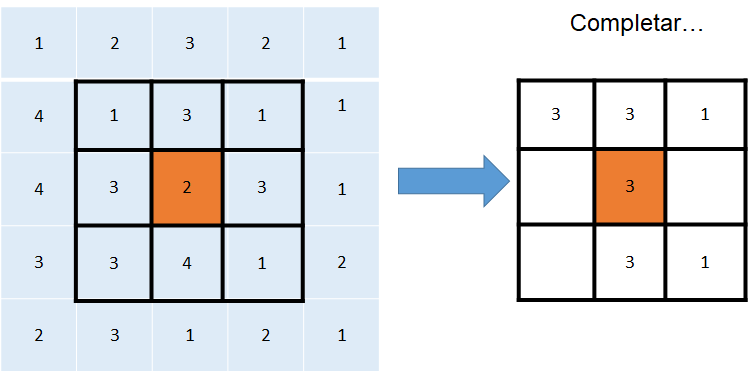

In [ ]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
        

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(22)
axs[0].imshow(campo[:,:,[2,1,0]])
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

## Clasificación de varias imágenes  (taggeo)

In [ ]:
import cv2
digitos=cv2.imread('digits.png')

cv2.imshow('pulse una tecla aqui',digitos)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

In [ ]:
print(type(digitos))

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)

import pandas as pd
df = pd.DataFrame(digits.data)
df.head()

**Cada fila contiene los 64 pixeles de la imagen de un dígito** 

hay 1797 imágenes/muestras de 8x8 con 10 tipos/clases de dígitos

**Gráfica de una de esas imágenes:**


In [ ]:

import numpy as np
primero=np.reshape(digits.data[0,:], [8,8])
plt.imshow(primero,cmap='gray')
plt.show()
